<a href="https://colab.research.google.com/github/ErnestoFCh/Simulacion-II/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Documentación: Simulación Epidemiológica

## Descripción General
Este programa simula la propagación de una enfermedad en una población fija, modelando tres estados principales en los individuos:
- **Susceptibles**: Individuos que no han contraído la enfermedad.
- **Infectados**: Individuos que han contraído la enfermedad y pueden transmitirla.
- **Recuperados**: Individuos que se infectaron y se recuperaron.

Además, incluye factores como la probabilidad de reinfección, el tiempo de recuperación, el uso de mascarillas, el dia de mayor infección y el número de infectados correspondiente.

## Clases Principales

### 1. Clase `Individual`
#### Propósito
Modela a un individuo de la población y su estado de salud.

#### Atributos
- `infected` (*bool*): Indica si el individuo está infectado.
- `days_infected` (*int*): Días desde que el individuo contrajo la infección.
- `ever_infected` (*bool*): Indica si el individuo ha sido infectado alguna vez.

#### Métodos
- `__init__()`: Constructor. Inicializa un individuo como no infectado.
- `get_infected(reinfection_rate)`: Infecta al individuo si es susceptible o según la probabilidad de reinfección.
- `increment_infection_days()`: Incrementa el número de días de infección en 1.
- `recover(recovery_days)`: Recupera al individuo si ha estado infectado por un número suficiente de días.
- `healthy()`: Devuelve al individuo a un estado saludable.

---

### 2. Clase `Region`
#### Propósito
Representa una región con una población de individuos.

#### Atributos
- `population` (*list*): Lista de objetos `Individual`.

#### Métodos
- `__init__()`: Constructor. Inicializa una región con una población vacía.
- `create_population(pop_total)`: Crea una población con un número dado de individuos.
- `start_infection(inf_total)`: Infecta aleatoriamente a un número inicial de individuos.

---

### 3. Clase `Simulation`
#### Propósito
Gestiona la simulación epidemiológica y recopila datos sobre la evolución de la enfermedad.

#### Atributos
- `inputs` (*dict*): Parámetros configurables de la simulación.
- `Grafico` (*bool*): Indica si se debe generar una gráfica.
- `Mascarilla` (*bool*): Indica si se debe considerar el uso de mascarillas.
- `Grafico_N` (*str*): Nombre del archivo de la gráfica.
- `region` (*Region*): Región donde se realiza la simulación.

#### Métodos
- `__init__(inputs, Grafico, Mascarilla, Grafico_N)`: Inicializa la simulación con los parámetros proporcionados.
- `set_region()`: Crea una región y su población.
- `susceptible_total()`: Retorna el número de individuos susceptibles.
- `infected_total()`: Retorna el número de individuos infectados.
- `recovered_total()`: Retorna el número de individuos recuperados.
- `simulate()`: Ejecuta la simulación, recopila datos y genera una gráfica (opcional).

---

## Parámetros de la Simulación
Los parámetros configurables son:
- `total population` (*int*): Tamaño total de la población.
- `initial infected` (*int*): Número inicial de individuos infectados.
- `interaction rate` (*int*): Número promedio de interacciones diarias por individuo.
- `infection rate` (*float*): Probabilidad de infección por interacción.
- `recovery rate` (*float*): Probabilidad de recuperación diaria.
- `recovery days` (*int*): Días requeridos para recuperarse.
- `reinfection rate` (*float*): Probabilidad de reinfección para individuos recuperados.
- `simulation time` (*int*): Duración de la simulación en días.
- `face mask` (*float*): Probabilidad de evitar infección con mascarilla.

---

## Salida de la Simulación
1. **Resultados impresos**:
   - `Total susceptibles`: Número final de individuos que nunca se infectaron.
   - `Total infectados`: Número final de individuos infectados.
   - `Total recuperados`: Número final de individuos recuperados.

2. **Gráfica (opcional)**:
   - Muestra la evolución de los grupos de población (susceptibles, infectados y recuperados) a lo largo del tiempo.

---

## Ejemplo de Uso
```python
# Configuración de la simulación
simulation_inputs1 = {
    'total population': 100,
    'initial infected': 1,
    'interaction rate': 13,
    'infection rate': 0.4,
    'recovery rate': 0.75,
    'recovery days': 7,  # Días para recuperarse
    'reinfection rate': 0.007,  # Probabilidad de reinfección
    'simulation time': 30,
    'face mask': 0.5  # Probabilidad de evitar infección con mascarilla
}

# Crear y ejecutar la simulación
app = Simulation(simulation_inputs1, Grafico=True, Mascarilla=True, Grafico_N='Grafico1')
total_susceptible, total_infected, total_recovered = app.simulate()

# Resultados finales
print(f"Resultados finales:")
print(f"Total susceptibles: {total_susceptible}")
print(f"Total infectados: {total_infected}")
print(f"Total recuperados: {total_recovered}")
```

---

## Consideraciones Adicionales
- **Reinfección**: Los individuos recuperados pueden reinfectarse según una probabilidad configurable.
- **Tiempo de recuperación**: Un individuo infectado debe estarlo un número mínimo de días antes de recuperarse.
- **Mascarillas**: Si se activan, reducen la probabilidad de infección durante una interacción.
---



### Funciones

---

#### Monte_Carlo
Esta función realiza una simulación Monte Carlo para modelar la dinámica de una epidemia. Ejecuta múltiples simulaciones individuales, acumula resultados y calcula promedios a lo largo de las iteraciones.

**Parámetros:**
- `N` (int): Número de simulaciones individuales a ejecutar.
- `Mask` (bool): Indica si los individuos usan mascarilla, lo cual afecta las tasas de infección en la simulación.
- `simulation_inputs` (dict): Diccionario con los parámetros de la simulación, como población total, tasas de infección, recuperación, etc.
- `Intancia_name` (Simulation): Instancia de la clase `Simulation` que se utiliza para ejecutar las simulaciones.

**Retorna:**
- `lind_S` (list): Lista con los promedios acumulados del número máximo de susceptibles por simulación.
- `lind_I` (list): Lista con los promedios acumulados del número máximo de infectados por simulación.
- `lind_R` (list): Lista con los promedios acumulados del número máximo de recuperados por simulación.
- `ld_S` (list): Lista con los promedios acumulados de los días en que hubo el máximo número de susceptibles.
- `ld_I` (list): Lista con los promedios acumulados de los días en que hubo el máximo número de infectados.
- `ld_R` (list): Lista con los promedios acumulados de los días en que hubo el máximo número de recuperados.

**Descripción del funcionamiento:**
1. Inicializa listas y variables acumuladoras para los promedios de individuos y días.
2. Ejecuta `N` simulaciones individuales usando la clase `Simulation`.
3. Para cada simulación:
   - Ejecuta la simulación con el método `simulate` de la instancia.
   - Obtiene el número máximo de individuos y el día correspondiente mediante la función `max_day`.
   - Acumula los datos de individuos y días en sus respectivas variables.
   - Calcula los promedios acumulados y los almacena en las listas correspondientes.
4. Devuelve las listas con los resultados promedios acumulados para individuos y días.

---

#### simulacion
Esta función ejecuta múltiples simulaciones Monte Carlo para obtener una muestra de resultados finales, como el número máximo de susceptibles, infectados, recuperados, número máximo de infectados en un día, luego de `N` simulaciones individuales.

**Parámetros:**
- `M` (int): Número de veces que se ejecutará la simulación Monte Carlo completa.
- `N` (int): Número de simulaciones individuales en cada ejecución Monte Carlo.
- `Mask` (bool): Indica si los individuos usan mascarilla en las simulaciones.
- `simulation_inputs` (dict): Diccionario con los parámetros de la simulación.
- `Intancia_name` (Simulation): Instancia de la clase `Simulation` para ejecutar las simulaciones.

**Retorna:**
- `r_S` (list): Lista con los resultados finales (último promedio acumulado) del número máximo de susceptibles (o el dato de interés) para cada ejecución Monte Carlo.
- `r_I` (list): Lista con los resultados finales del número máximo de infectados (o el dato de interés).
- `r_R` (list): Lista con los resultados finales del número máximo de recuperados (o el dato de interés).

**Descripción del funcionamiento:**
1. Inicializa listas para almacenar los resultados finales de los susceptibles, infectados y recuperados.
2. Ejecuta `M` simulaciones Monte Carlo:
   - Llama a la función `Monte_Carlo` para realizar `N` simulaciones individuales.
   - Obtiene el último promedio acumulado para susceptibles, infectados y recuperados y los almacena.
3. Devuelve las listas con los resultados finales de las simulaciones.

---
### función auxiliar: max_day
- Recibe una lista de valores por día (por ejemplo, número de infectados).
- Devuelve el valor máximo de la lista junto con el día en que ocurrió.

Esto se utiliza en ambas funciones para determinar las estadísticas más relevantes de cada simulación.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
class Individual:
    def __init__(self):           #Constructor
        self.infected = False        #Indica que no esta infectado
        self.days_infected = 0       #Indica el numero de dias de infeccion
        self.ever_infected = False  # Indica si el individuo ha sido infectado alguna vez
#Metodos/ Comportamientos
    def get_infected(self, reinfection_rate):  #Infeccion del individuo
        if not self.infected and (not self.ever_infected or np.random.rand() <= reinfection_rate): #Condiciones de reinfeccion e infeccion
            self.infected = True      #Infecta al individu
            self.days_infected = 0    #Resetea los dias de infeccion
            self.ever_infected = True  # Marca que fue infectado al menos una vez

    def increment_infection_days(self):   #Seguimiento de dias de infeccion
        if self.infected:
            self.days_infected += 1       #Si el individuo esta infectado, lleva el conteo de los dias que permanece enfermo

    def recover(self, recovery_days):            #Recuperacion del individuo
        if self.days_infected >= recovery_days:  # Recuperación después de `recovery_days`
            self.infected = False                # Se recupera
            self.days_infected = 0               #Resetea el numero de dias de infeccion

    def healthy(self):                           #Individuo que permanece sano
        self.infected = False
        self.days_infected = 0

In [3]:
class Region:
    def __init__(self):
        self.population = []

    def create_population(self, pop_total):         #Creamos a la poblacion
        for i in range(pop_total):
            self.population.append(Individual())    #Cada elemento de la poblacion es un Individuo

    def start_infection(self, inf_total):           #Iniciamos una infeccion aleatoria de tamaño inf_total
        infected = np.random.choice(self.population,
                                    inf_total,
                                    replace=False)
        for i in infected:                       #Infectamos a los individuos seleccionados
            i.get_infected(reinfection_rate=0)  # Sin reinfección inicial para no iniciar el contador

In [4]:
class Simulation:
    def __init__(self, inputs, Grafico,Save_G, Mascarilla,Grafico_N):
        self.inputs = inputs
        self.Grafico = Grafico
        self.Mascarilla = Mascarilla
        self.Save_G = Save_G
        self.Grafico_N = Grafico_N
        self.set_region()

    def set_region(self):
        self.region = Region()        #La Region contiene a la poblacion de individuos donde ocurrira la simulacion
        self.region.create_population(self.inputs['total population'])  #Crea la lista de individuos sanos
        self.region.start_infection(self.inputs['initial infected'])    #Infecta aleatoriamente a los individuos de la poblacion segun 'initial infected'

    def susceptible_total(self):
        return sum(1 for i in self.region.population if not i.ever_infected) #Contabiliza los individuos sanos

    def infected_total(self):
        return sum(1 for i in self.region.population if i.infected)         #Contabiliza los individuos infectados

    def recovered_total(self):
        return sum(1 for i in self.region.population if i.ever_infected and not i.infected) #Contabiliza los individuos recuperados

    def simulate(self): #Comienza la simulacion
        total_susceptible = [self.susceptible_total()]  #Guarda el numero de individuos sanos
        total_infected = [self.infected_total()]        #Guarda el numero de individuos infectados
        total_recovered = [self.recovered_total()]      #Guarda el numero de individuos recuperados

        for t in range(self.inputs['simulation time']):         #Iniciamos la simulacion por dia t
            for ind in self.region.population:                  #Tomamos individuos ind de la region
                if ind.infected:                                #Verificamos si es alguien infectado
                    ind.increment_infection_days()               #Incrementamos el numero de dias de infeccion
                    if np.random.rand() <= self.inputs['recovery rate']:  #Se recupera segun un recovery rate y si cumple las condiciones de recuperacion
                        ind.recover(self.inputs['recovery days'])
                elif not ind.infected:                            #Evalua a los no infectados
                    interactions = np.random.choice(
                        self.region.population,
                        self.inputs['interaction rate'],         #El individuo interactua aleatoriamente con miembros de la poblacion
                        replace=False
                    )
                    for interaction in interactions:             #Evalua las interacciones con cada individuo
                        if interaction.infected and np.random.rand() <= self.inputs['infection rate']: #Si interactua con alguien infectado por primera vez lo infecta segun infection rate
                            ind.get_infected(self.inputs['reinfection rate'])                           #Si ya habia contraido la enfermedad, lo infecta segun un reinfection rate
                            if self.Mascarilla and np.random.rand() <= self.inputs['face mask']:         #Si usa mascarilla evalua la efectividad de la mascarilla segun face mask
                                ind.healthy()

            total_susceptible.append(self.susceptible_total())
            total_infected.append(self.infected_total())
            total_recovered.append(self.recovered_total())

        # Gráfica
        if self.Grafico:
            plt.style.use('seaborn-v0_8-notebook')
            plt.figure()
            title = "Simulación de infección con mascarilla" if self.Mascarilla else "Simulación de infección"
            plt.title(title)
            plt.xlabel('Tiempo')
            plt.ylabel('Número de individuos')
            plt.plot(range(len(total_susceptible)), total_susceptible, label='Susceptibles', color='blue')
            plt.plot(range(len(total_infected)), total_infected, label='Infectados', color='red')
            plt.plot(range(len(total_recovered)), total_recovered, label='Recuperados', color='green')
            plt.legend()
            if self.Save_G:
              plt.savefig(self.Grafico_N + '.png')
            plt.show()

        return total_susceptible, total_infected, total_recovered


In [5]:
#Save = True or False
def estaditicos(G, Save,Graphic,N_Grafico):
  media = np.mean(G) #calculamos la media de las medias de la muestra
  desv = np.std(G)   #Calculamos el error estandar de la media

  # Calculamos el intervalo de confianza del 95%
  confianza = 0.95
  grados_libertad = len(G) - 1
  limite_inferior, limite_superior = stats.t.interval(confianza, grados_libertad, loc=media, scale=desv)

  print("Media: ", media)
  print("Error estandar de la media: ", desv)
  a = f"Intervalo de confianza del 95%: [{limite_inferior},{limite_superior}]"

  if Graphic:
    #Graficamos un intervalo de confianza de un error estandar
    plt.axhline(media,color='r',linestyle='--') #media
    plt.axhline((media + desv),color='g') #limite superior del intervalo
    plt.axhline((media - desv),color='g') #limite inferior del intervalo
    plt.plot(G)
    if Save:
      plt.savefig(N_Grafico + '.png')
    plt.show()

  return a

In [6]:
def max_day(L):
  max_infected = max(L)
  day = L.index(max_infected)
  return max_infected, day

In [79]:
def Monte_Carlo(N, Mask,simulation_inputs, Intancia_name):
  #Listas para numero de individuos
  lind_S = []
  lind_I = []
  lind_R = []
  #Acumulacion de numero de individuos
  ind_S = 0
  ind_I = 0
  ind_R = 0

  #Listas para numero de dias
  ld_S = []
  ld_I = []
  ld_R = []
  #Acumulacion de numero de dias
  d_S = 0
  d_I = 0
  d_R = 0

  for i in range(N):

    Intancia_name = Simulation(simulation_inputs, False, False, Mask, Grafico_N = '') #Creacion de la instancia de la simulacion
    LS,LI,LR,  = Intancia_name.simulate() #Guardamos los parametros

    #Guardamos informacion no. Individuos, Dia
    indS, dS = max_day(LS)
    indI, dI = max_day(LI)
    indR, dR = max_day(LR)

    #Acumulamos individuos

    ind_S += indS
    ind_I += indI
    ind_R += indR

    #Acumulamos dias
    d_S += dS
    d_I += dI
    d_R += dR
    #Guardamos medias de los individuos
    lind_S.append(ind_S/(i+1))
    lind_I.append(ind_I/(i+1))
    lind_R.append(ind_R/(i+1))
    #Guradamos media de los dias
    ld_S.append(d_S/(i + 1))
    ld_I.append(d_I/(i + 1))
    ld_R.append(d_R/(i + 1))

  return lind_S, lind_I, lind_R, ld_S, ld_I, ld_R

In [138]:
def simulacion(M,N,Mask,simulation_inputs,Intancia_name):
  r_S = []
  r_I = []
  r_R = []
  for i in range(M): #Repetimos la simulacion M veces para obtener muestras aleatorias
    S, I, R,_,_,_ = Monte_Carlo(N, Mask, simulation_inputs,Intancia_name)
    #Obtenemos el ultimo dato de las muestras de tamaño N
    r_S.append(S[-1])
    r_I.append(I[-1])
    r_R.append(R[-1])

  return r_S, r_I, r_R

In [9]:
def show_data(data_inputs, name_app, SG, mascarilla, NG):

  # Crear y ejecutar la simulación
  name_app = Simulation(inputs = data_inputs, Grafico = True, Save_G= SG, Mascarilla = mascarilla , Grafico_N = NG)
  total_susceptible, total_infected, total_recovered= name_app.simulate()

  print(f"Resultados finales:")
  print(f"Total susceptibles: {total_susceptible[-1]}")
  print(f"Total infectados: {total_infected[-1]}")
  print(f"Total recuperados: {total_recovered[-1]}")
  return total_susceptible, total_infected, total_recovered


#Simulación sin mascarilla (Primer escenario)

In [132]:
# Configuración de la simulación
simulation_inputs1 = {
    'total population': 100,
    'initial infected': 1,
    'interaction rate': 13,
    'infection rate': 0.4,
    'recovery rate': 0.75,
    'recovery days': 7,  # Nuevo: Días requeridos para recuperarse
    'reinfection rate': 0.007,  # Nuevo: Probabilidad de reinfección
    'simulation time': 30,
    'face mask': 0  # Probabilidad de evitar infección con mascarilla
}

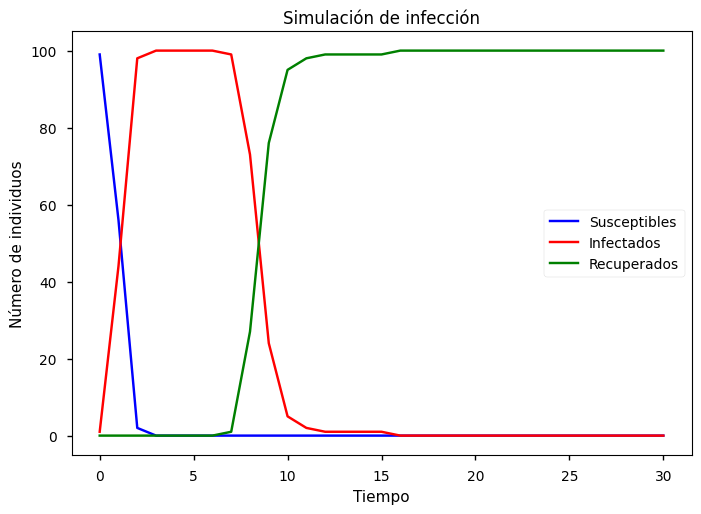

Resultados finales:
Total susceptibles: 0
Total infectados: 0
Total recuperados: 100


In [133]:
#show_data(data_inputs, name_app, SaveGraphic, mascarilla, NameGraphic):
S, I, R = show_data(simulation_inputs1, 'app', True, False, 'Grafico1')

In [134]:
N = 200

In [135]:
simulation_inputs1['simulation time'] = 20

In [136]:
_, _, _, _, daysI_nmask, _ = Monte_Carlo(N, False,simulation_inputs1, 'app_1')

Media:  2.6441489700211904
Error estandar de la media:  0.05635101124028872


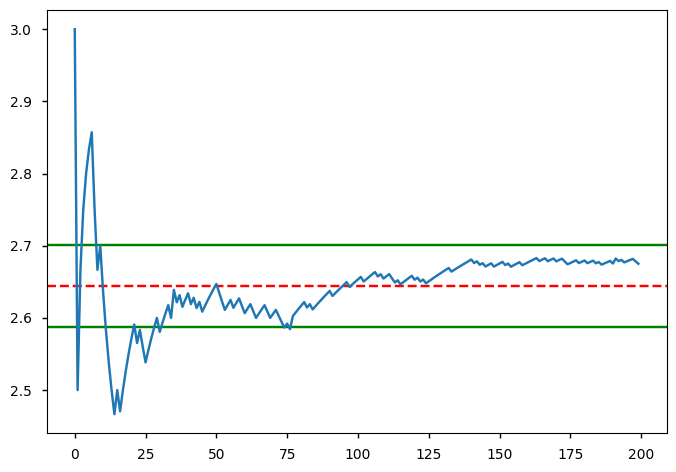

In [137]:
a1 = estaditicos(daysI_nmask, Save=True, Graphic=True, N_Grafico = 'Grafico2')

#Simulación con mascarilla

In [125]:
# Configuración de la simulación
simulation_inputs2 = {
    'total population': 100,
    'initial infected': 1,
    'interaction rate': 13,
    'infection rate': 0.4,
    'recovery rate': 0.75,
    'recovery days': 7,  # Nuevo: Días requeridos para recuperarse
    'reinfection rate': 0.007,  # Nuevo: Probabilidad de reinfección
    'simulation time': 30,
    'face mask': 0.5  # Probabilidad de evitar infección con mascarilla
}

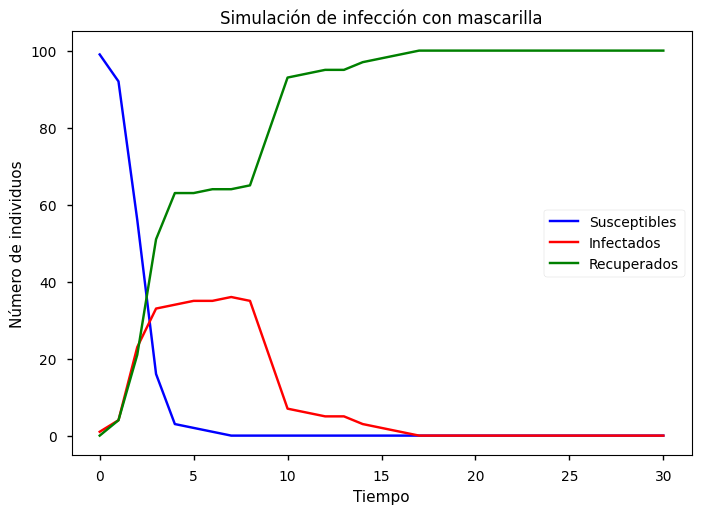

Resultados finales:
Total susceptibles: 0
Total infectados: 0
Total recuperados: 100


In [126]:
#show_data(data_inputs, name_app, SaveGraphic, mascarilla, NameGraphic):
aS, aI, aR = show_data(simulation_inputs2, 'app1', True, True, 'Grafico3')

In [127]:
n = 200

In [128]:
_, ind_I, _, _, daysI_mask, _ = Monte_Carlo(n, True,simulation_inputs2, 'app_2')

Dia esperado de maximo contagio.

Media:  5.092724961076238
Error estandar de la media:  0.08566306978629645


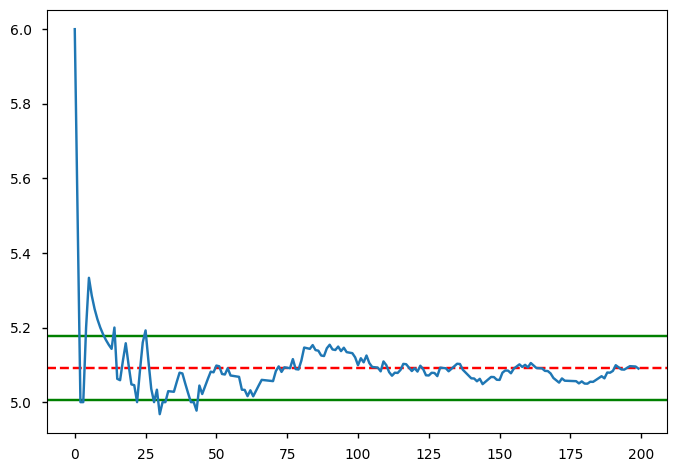

In [129]:
b1 = estaditicos(daysI_mask, Save=True, Graphic=True, N_Grafico = 'Grafico4')

Numero de infectados esperados.

Media:  38.423909597183226
Error estandar de la media:  0.5842854850873562


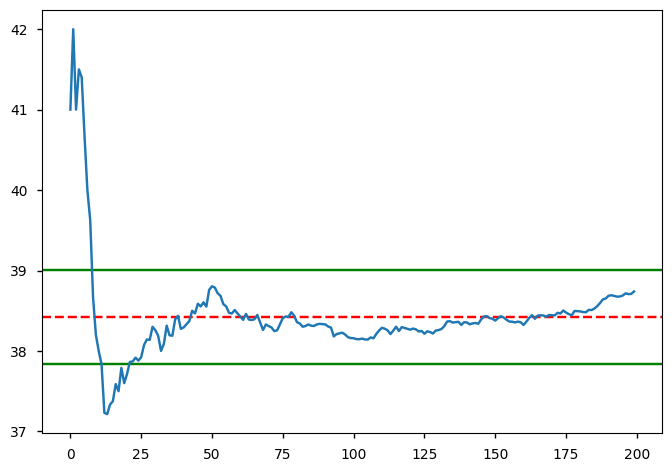

In [130]:
b2 = estaditicos(ind_I, Save=True, Graphic=True, N_Grafico = 'Grafico5')

#Estrategias: Disminucion de interaccion - Disminucion de trabajadores en el edificio.

##La simulación con mascarilla es la estrategia 1: Ineracción al 100% - 100% de los trabajadores en el edificio.
Con los siguientes resultados.

In [131]:
print('Dia esperado donde se presenta el maximo numero de contagios.\n')
B1 = estaditicos(daysI_mask, Save=False, Graphic=False, N_Grafico = 'Grafico4')
print('\n', B1)
print('\nNumero maximo de contagios.\n')
B2 = estaditicos(ind_I, Save=False, Graphic=False, N_Grafico = 'Grafico5')
print('\n', B2)

Dia esperado donde se presenta el maximo numero de contagios.

Media:  5.092724961076238
Error estandar de la media:  0.08566306978629645

 Intervalo de confianza del 95%: [4.923801110010658,5.261648812141818]

Numero maximo de contagios.

Media:  38.423909597183226
Error estandar de la media:  0.5842854850873562

 Intervalo de confianza del 95%: [37.27172401115528,39.57609518321117]


In [63]:
# Configuración de la simulación
inputs = {
    'total population': 100,
    'initial infected': 1,
    'interaction rate': 13,
    'infection rate': 0.4,
    'recovery rate': 0.75,
    'recovery days': 7,  #  Días requeridos para recuperarse
    'reinfection rate': 0.007,  # Probabilidad de reinfección
    'simulation time': 30,
    'face mask': 0.5  # Probabilidad de evitar infección con mascarilla
}

##Estrategia 2: 100 - 50

In [32]:
inputs2 = inputs.copy()
inputs2['total population'] = int(0.5 * inputs2['total population'])
inputs2

{'total population': 50,
 'initial infected': 1,
 'interaction rate': 13,
 'infection rate': 0.4,
 'recovery rate': 0.75,
 'recovery days': 7,
 'reinfection rate': 0.007,
 'simulation time': 30,
 'face mask': 0.5}

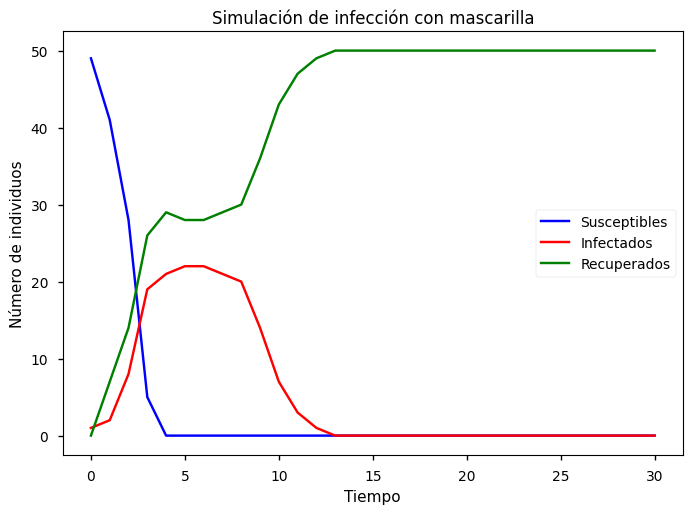

Resultados finales:
Total susceptibles: 0
Total infectados: 0
Total recuperados: 50


In [33]:
#show_data(data_inputs, name_app, SaveGraphic, mascarilla, NameGraphic):
bS, bI, bR = show_data(inputs2, 'st2', True, True, 'St_G1')

In [34]:
n = 200

In [35]:
_, ind_I, _, _, daysI, _ = Monte_Carlo(n, True,inputs2, 'sta_2')

Media:  4.158272990720836
Error estandar de la media:  0.1613952699594808


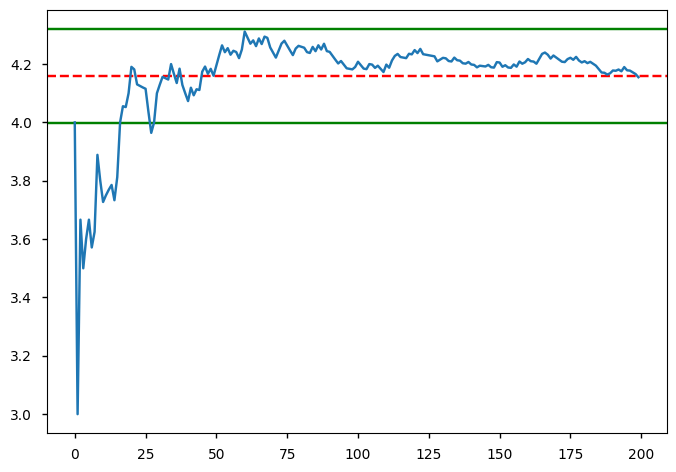

In [36]:
c1 = estaditicos(daysI, Save=True, Graphic=True, N_Grafico = 'ST2_dI')

Media:  19.46913966590295
Error estandar de la media:  0.32416612440135173


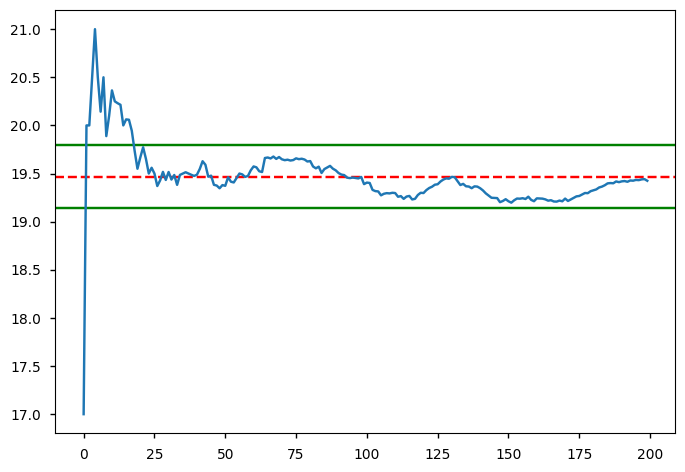

In [37]:
c2 = estaditicos(ind_I, Save=True, Graphic=True, N_Grafico = 'ST2_iI')

In [38]:
print('Dia esperado donde se presenta el maximo numero de contagios.\n')
C1 = estaditicos(daysI, Save=False, Graphic=False, N_Grafico = '')
print('\n', C1)
print('\nNumero maximo de contagios.\n')
C2 = estaditicos(ind_I, Save=False, Graphic=False, N_Grafico = '')
print('\n', C2)

Dia esperado donde se presenta el maximo numero de contagios.

Media:  4.158272990720836
Error estandar de la media:  0.1613952699594808

 Intervalo de confianza del 95%: [3.84000853191334,4.476537449528332]

Numero maximo de contagios.

Media:  19.46913966590295
Error estandar de la media:  0.32416612440135173

 Intervalo de confianza del 95%: [18.82989815546574,20.10838117634016]


##Estrategia 3 : 100 - 25

In [39]:
inputs3 = inputs.copy()
inputs3['total population'] = int(0.25 * inputs3['total population'])
inputs3

{'total population': 25,
 'initial infected': 1,
 'interaction rate': 13,
 'infection rate': 0.4,
 'recovery rate': 0.75,
 'recovery days': 7,
 'reinfection rate': 0.007,
 'simulation time': 30,
 'face mask': 0.5}

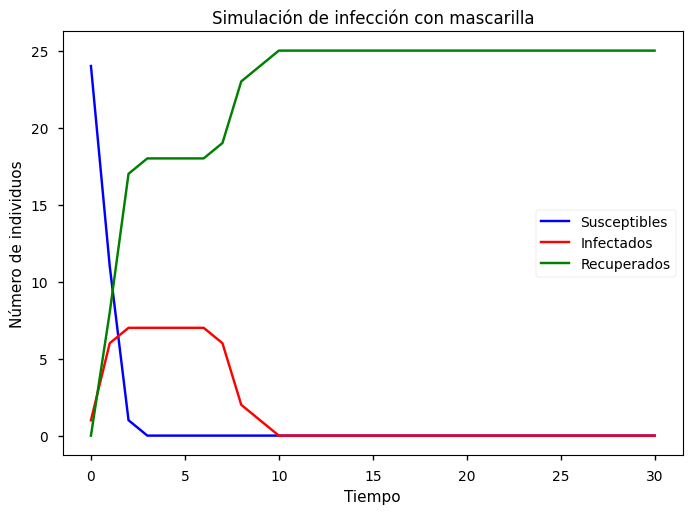

Resultados finales:
Total susceptibles: 0
Total infectados: 0
Total recuperados: 25


In [40]:
#show_data(data_inputs, name_app, SaveGraphic, mascarilla, NameGraphic):
cS, cI, cR = show_data(inputs3, 'st3', True, True, 'St_G2')

In [41]:
_, aind_I, _, _, adaysI, _ = Monte_Carlo(n, True,inputs3, 'sta_3')

Media:  3.3299815821822984
Error estandar de la media:  0.1647487265594518


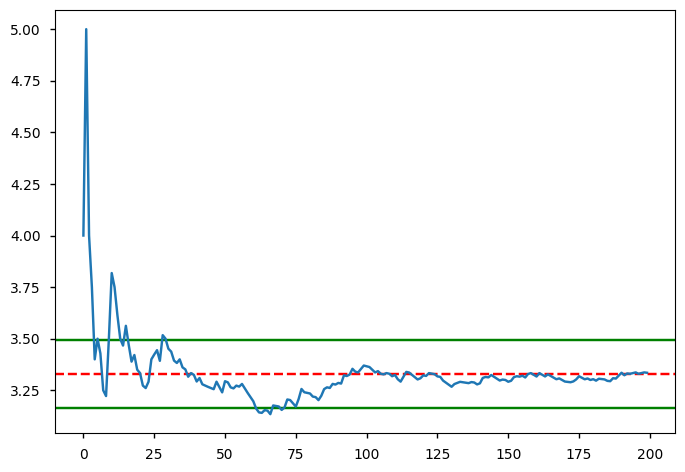

In [42]:
d1 = estaditicos(adaysI, Save=True, Graphic=True, N_Grafico = 'ST3_dI')

Media:  9.864078518353525
Error estandar de la media:  0.28100368999719255


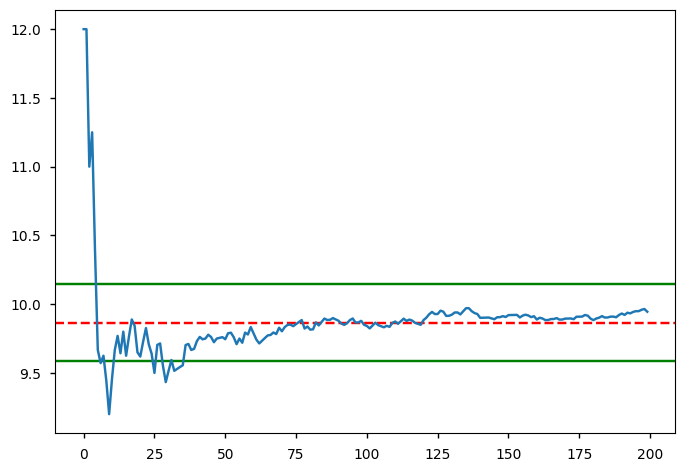

In [43]:
d2 = estaditicos(aind_I, Save=True, Graphic=True, N_Grafico = 'ST3_iI')

In [44]:
print('Dia esperado donde se presenta el maximo numero de contagios.\n')
D1 = estaditicos(adaysI, Save=False, Graphic=False, N_Grafico = '')
print('\n', D1)
print('\nNumero maximo de contagios.\n')
D2 = estaditicos(aind_I, Save=False, Graphic=False, N_Grafico = '')
print('\n', D2)

Dia esperado donde se presenta el maximo numero de contagios.

Media:  3.3299815821822984
Error estandar de la media:  0.1647487265594518

 Intervalo de confianza del 95%: [3.0051042526866336,3.6548589116779633]

Numero maximo de contagios.

Media:  9.864078518353525
Error estandar de la media:  0.28100368999719255

 Intervalo de confianza del 95%: [9.309951452905333,10.418205583801717]


##Estrategia 4 : 50 - 100

In [80]:
inputs4 = inputs.copy()
inputs4['interaction rate'] = int(0.5 * inputs4['interaction rate'])
inputs4

{'total population': 100,
 'initial infected': 1,
 'interaction rate': 6,
 'infection rate': 0.4,
 'recovery rate': 0.75,
 'recovery days': 7,
 'reinfection rate': 0.007,
 'simulation time': 30,
 'face mask': 0.5}

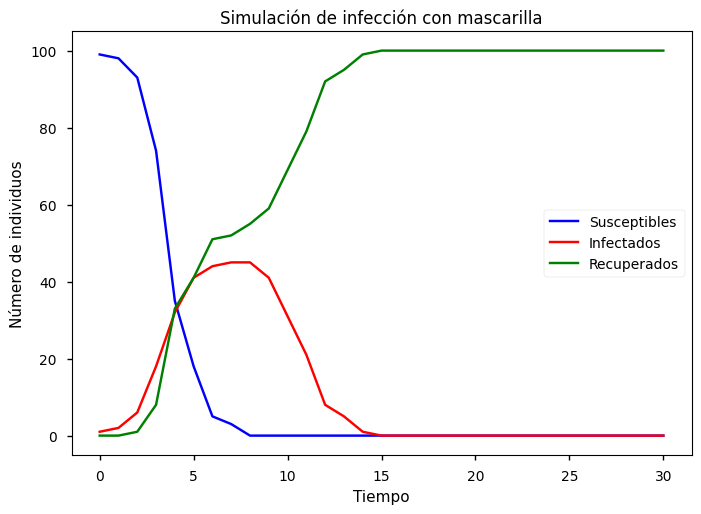

Resultados finales:
Total susceptibles: 0
Total infectados: 0
Total recuperados: 100


In [81]:
#show_data(data_inputs, name_app, SaveGraphic, mascarilla, NameGraphic):
cS, cI, cR = show_data(inputs4, 'st4', True, True, 'St_G4')

In [85]:
_, eind_I, _, _, edaysI, _ = Monte_Carlo(200, True,inputs4, 'sta_4')

Media:  7.056894525516816
Error estandar de la media:  0.19593567864574776


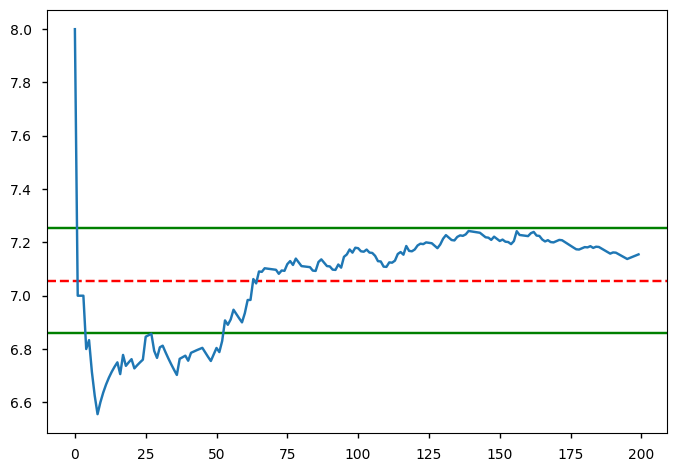

In [86]:
e1 = estaditicos(edaysI, Save=True, Graphic=True, N_Grafico = 'ST4_dI')

Media:  43.88593580442446
Error estandar de la media:  0.6974090759341214


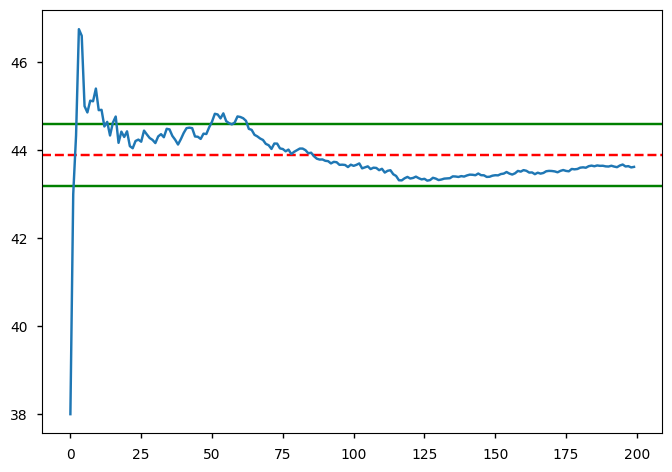

In [87]:
e2 = estaditicos(eind_I, Save=True, Graphic=True, N_Grafico = 'ST4_iI')

In [88]:
print('Dia esperado donde se presenta el maximo numero de contagios.\n')
E1 = estaditicos(edaysI, Save=False, Graphic=False, N_Grafico = '')
print('\n', E1)
print('\nNumero maximo de contagios.\n')
E2 = estaditicos(eind_I, Save=False, Graphic=False, N_Grafico = '')
print('\n', E2)

Dia esperado donde se presenta el maximo numero de contagios.

Media:  7.056894525516816
Error estandar de la media:  0.19593567864574776

 Intervalo de confianza del 95%: [6.670517881759387,7.443271169274245]

Numero maximo de contagios.

Media:  43.88593580442446
Error estandar de la media:  0.6974090759341214

 Intervalo de confianza del 95%: [42.51067541311725,45.26119619573168]


##Estrategia 5 : 50 - 50

In [89]:
inputs5 = inputs.copy()
inputs5['interaction rate'] = int(0.5 * inputs5['interaction rate'])
inputs5['total population'] = int(0.5 * inputs5['total population'])
inputs5

{'total population': 50,
 'initial infected': 1,
 'interaction rate': 6,
 'infection rate': 0.4,
 'recovery rate': 0.75,
 'recovery days': 7,
 'reinfection rate': 0.007,
 'simulation time': 30,
 'face mask': 0.5}

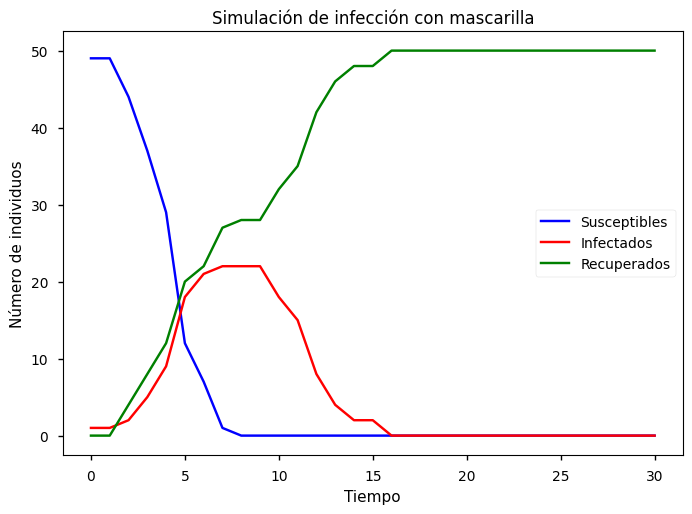

Resultados finales:
Total susceptibles: 0
Total infectados: 0
Total recuperados: 50


In [90]:
#show_data(data_inputs, name_app, SaveGraphic, mascarilla, NameGraphic):
fS, fI, fR = show_data(inputs5, 'st5', True, True, 'St_G5')

In [92]:
_, find_I, _, _, fdaysI, _ = Monte_Carlo(n, True,inputs5, 'sta_5')

Media:  5.989402819256815
Error estandar de la media:  0.34570789193072254


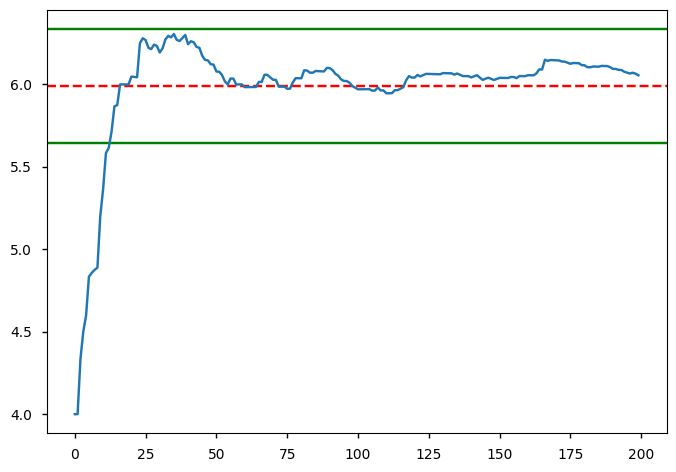

In [94]:
f1 = estaditicos(fdaysI, Save=True, Graphic=True, N_Grafico = 'ST5_dI')

Media:  21.803939672900295
Error estandar de la media:  0.5513181928703845


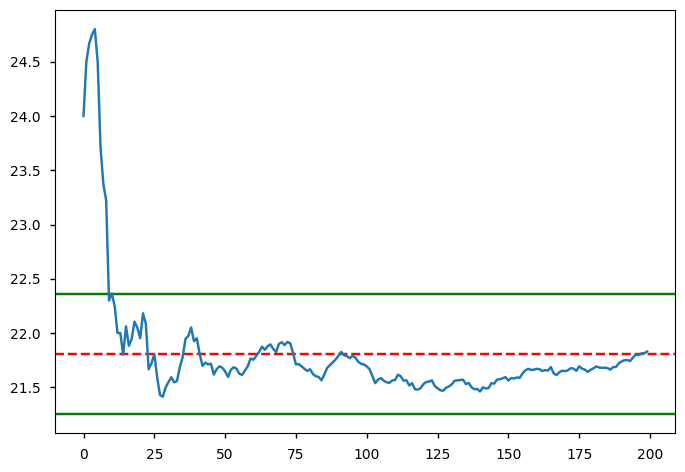

In [95]:
f2 = estaditicos(find_I, Save=True, Graphic=True, N_Grafico = 'ST5_iI')

In [96]:
print('Dia esperado donde se presenta el maximo numero de contagios.\n')
F1 = estaditicos(fdaysI, Save=False, Graphic=False, N_Grafico = '')
print('\n', F1)
print('\nNumero maximo de contagios.\n')
F2 = estaditicos(find_I, Save=False, Graphic=False, N_Grafico = '')
print('\n', F2)

Dia esperado donde se presenta el maximo numero de contagios.

Media:  5.989402819256815
Error estandar de la media:  0.34570789193072254

 Intervalo de confianza del 95%: [5.307681879365364,6.671123759148267]

Numero maximo de contagios.

Media:  21.803939672900295
Error estandar de la media:  0.5513181928703845

 Intervalo de confianza del 95%: [20.71676415450579,22.8911151912948]


##Estrategia 6 : 50 - 25

In [98]:
inputs6 = inputs.copy()
inputs6['interaction rate'] = int(0.5 * inputs6['interaction rate'])
inputs6['total population'] = int(0.25 * inputs6['total population'])
inputs6

{'total population': 25,
 'initial infected': 1,
 'interaction rate': 6,
 'infection rate': 0.4,
 'recovery rate': 0.75,
 'recovery days': 7,
 'reinfection rate': 0.007,
 'simulation time': 30,
 'face mask': 0.5}

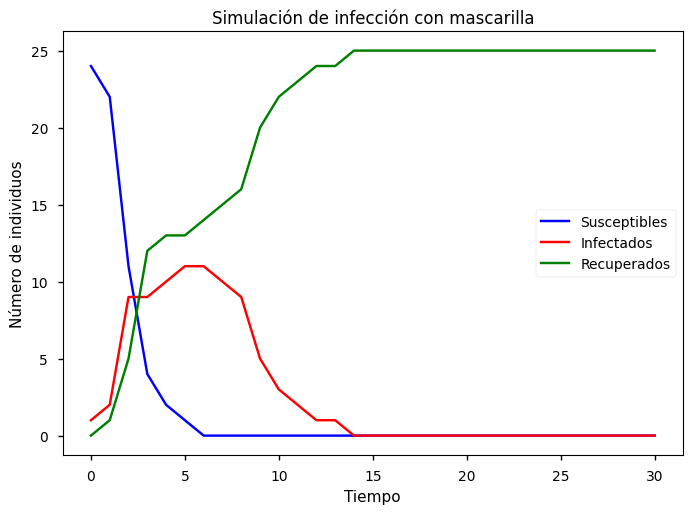

Resultados finales:
Total susceptibles: 0
Total infectados: 0
Total recuperados: 25


In [99]:
#show_data(data_inputs, name_app, SaveGraphic, mascarilla, NameGraphic):
gS, gI, gR = show_data(inputs6, 'st6', True, True, 'St_G6')

In [100]:
_, gind_I, _, _, gdaysI, _ = Monte_Carlo(n, True,inputs6, 'sta_6')

Media:  4.848773622692514
Error estandar de la media:  0.10111423133211933


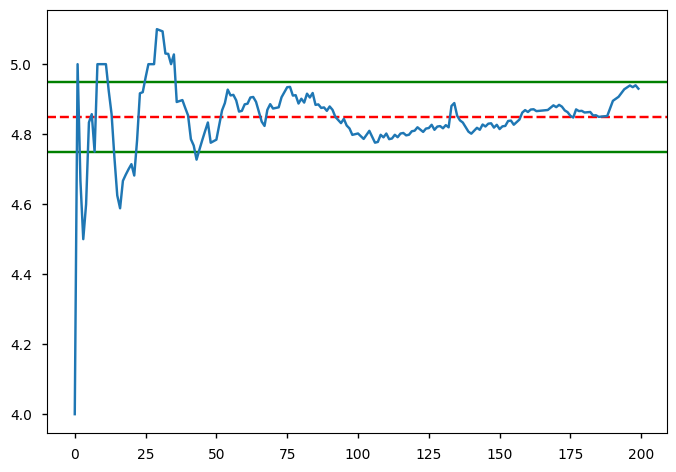

In [101]:
g1 = estaditicos(gdaysI, Save=True, Graphic=True, N_Grafico = 'ST6_dI')

Media:  10.771530061936165
Error estandar de la media:  0.2958837268657691


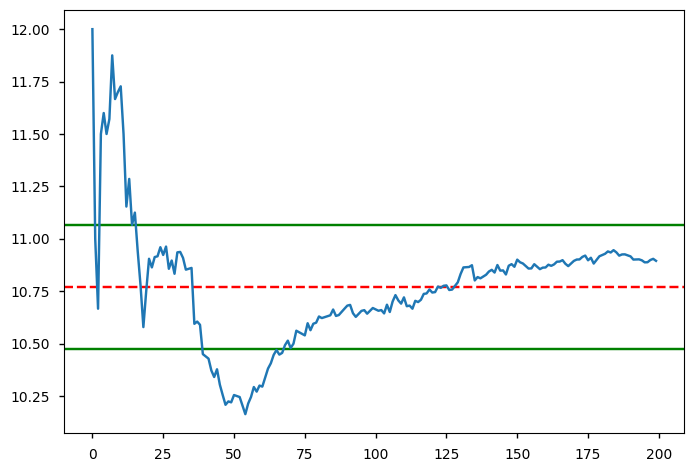

In [102]:
g2 = estaditicos(gind_I, Save=True, Graphic=True, N_Grafico = 'ST6_iI')

In [103]:
print('Dia esperado donde se presenta el maximo numero de contagios.\n')
G1 = estaditicos(gdaysI, Save=False, Graphic=False, N_Grafico = '')
print('\n', G1)
print('\nNumero maximo de contagios.\n')
G2 = estaditicos(gind_I, Save=False, Graphic=False, N_Grafico = '')
print('\n', G2)

Dia esperado donde se presenta el maximo numero de contagios.

Media:  4.848773622692514
Error estandar de la media:  0.10111423133211933

 Intervalo de confianza del 95%: [4.649380752500394,5.048166492884634]

Numero maximo de contagios.

Media:  10.771530061936165
Error estandar de la media:  0.2958837268657691

 Intervalo de confianza del 95%: [10.188060210406311,11.354999913466019]


##Estrategia 7 : 25 - 100

In [104]:
inputs7 = inputs.copy()
inputs7['interaction rate'] = int(0.25 * inputs7['interaction rate'])
inputs7['total population'] = int(1 * inputs7['total population'])
inputs7

{'total population': 100,
 'initial infected': 1,
 'interaction rate': 3,
 'infection rate': 0.4,
 'recovery rate': 0.75,
 'recovery days': 7,
 'reinfection rate': 0.007,
 'simulation time': 30,
 'face mask': 0.5}

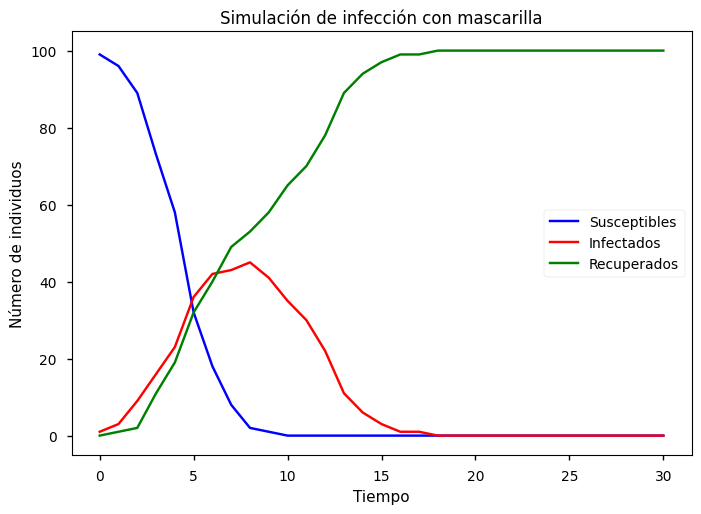

Resultados finales:
Total susceptibles: 0
Total infectados: 0
Total recuperados: 100


In [105]:
#show_data(data_inputs, name_app, SaveGraphic, mascarilla, NameGraphic):
hS, hI, hR = show_data(inputs7, 'st7', True, True, 'St_G7')

In [107]:
_, hind_I, _, _, hdaysI, _ = Monte_Carlo(n, True,inputs7, 'sta_7')

Media:  10.149536414792417
Error estandar de la media:  0.20201315610468956


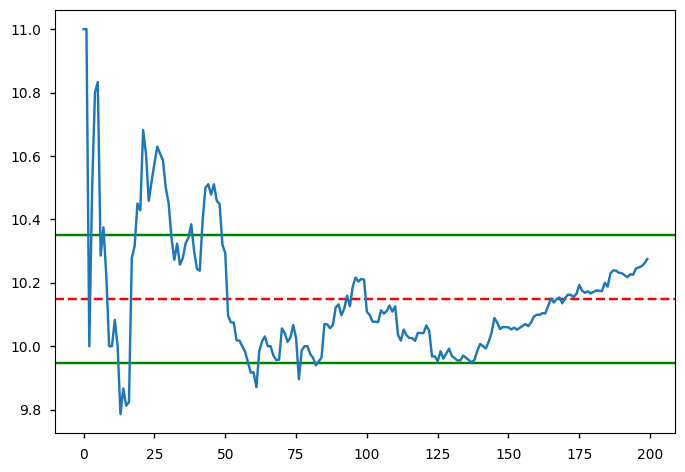

In [108]:
h1 = estaditicos(hdaysI, Save=True, Graphic=True, N_Grafico = 'ST7_dI')

Media:  38.51320767852543
Error estandar de la media:  1.509697844944249


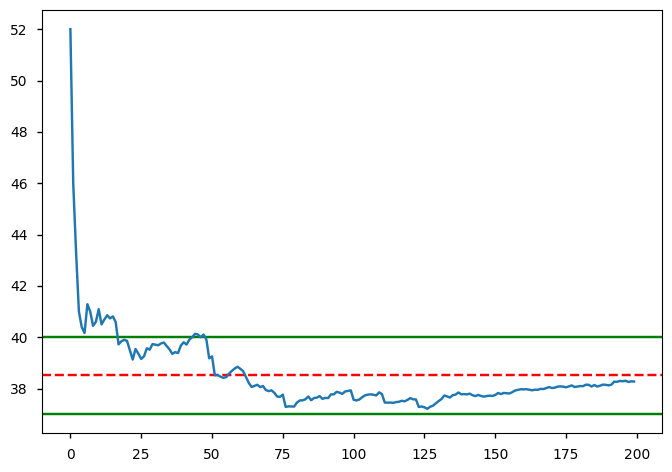

In [109]:
h2 = estaditicos(hind_I, Save=True, Graphic=True, N_Grafico = 'ST7_iI')

In [110]:
print('Dia esperado donde se presenta el maximo numero de contagios.\n')
H1 = estaditicos(hdaysI, Save=False, Graphic=False, N_Grafico = '')
print('\n', H1)
print('\nNumero maximo de contagios.\n')
H2 = estaditicos(hind_I, Save=False, Graphic=False, N_Grafico = '')
print('\n', H2)

Dia esperado donde se presenta el maximo numero de contagios.

Media:  10.149536414792417
Error estandar de la media:  0.20201315610468956

 Intervalo de confianza del 95%: [9.7511752495873,10.547897579997533]

Numero maximo de contagios.

Media:  38.51320767852543
Error estandar de la media:  1.509697844944249

 Intervalo de confianza del 95%: [35.53614913334841,41.490266223702456]


##Estrategia 8 : 25 - 50

In [111]:
inputs8 = inputs.copy()
inputs8['interaction rate'] = int(0.25 * inputs8['interaction rate'])
inputs8['total population'] = int(0.5 * inputs8['total population'])
inputs8

{'total population': 50,
 'initial infected': 1,
 'interaction rate': 3,
 'infection rate': 0.4,
 'recovery rate': 0.75,
 'recovery days': 7,
 'reinfection rate': 0.007,
 'simulation time': 30,
 'face mask': 0.5}

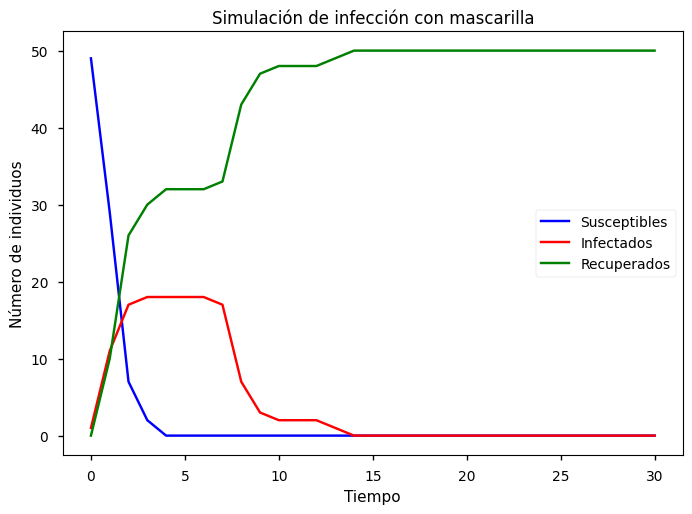

Resultados finales:
Total susceptibles: 0
Total infectados: 0
Total recuperados: 50


In [112]:
#show_data(data_inputs, name_app, SaveGraphic, mascarilla, NameGraphic):
jS, jI, jR = show_data(inputs2, 'st8', True, True, 'St_G8')

In [113]:
_, jind_I, _, _, jdaysI, _ = Monte_Carlo(n, True,inputs8, 'sta_8')

Media:  9.151279607655907
Error estandar de la media:  0.5802506161791109


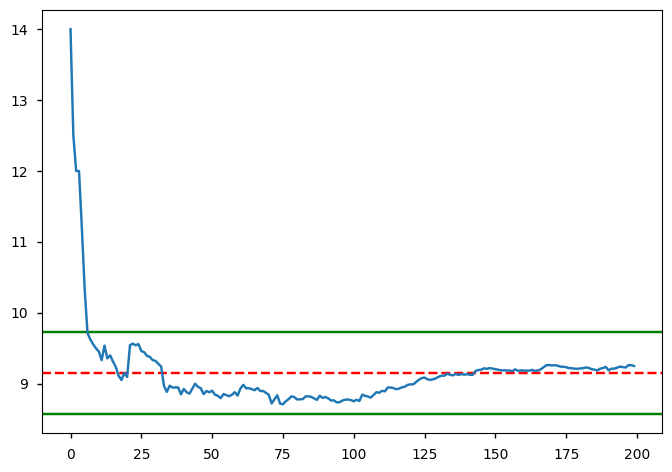

In [114]:
j1 = estaditicos(jdaysI, Save=True, Graphic=True, N_Grafico = 'ST8_dI')

Media:  19.930870646244227
Error estandar de la media:  0.6851196283182203


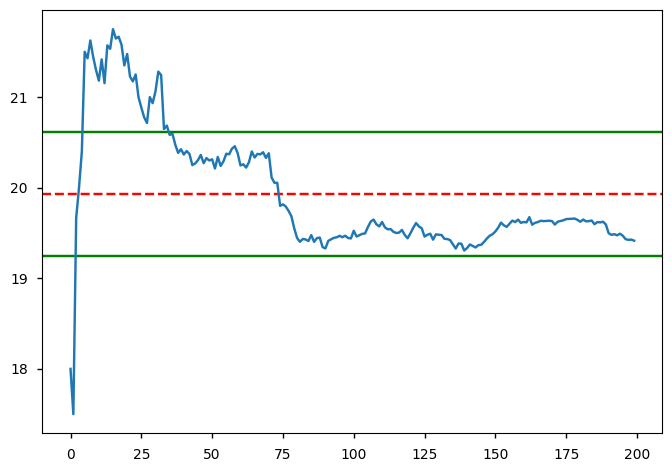

In [115]:
j2 = estaditicos(jind_I, Save=True, Graphic=True, N_Grafico = 'ST8_iI')

In [116]:
print('Dia esperado donde se presenta el maximo numero de contagios.\n')
J1 = estaditicos(jdaysI, Save=False, Graphic=False, N_Grafico = '')
print('\n', J1)
print('\nNumero maximo de contagios.\n')
J2 = estaditicos(jind_I, Save=False, Graphic=False, N_Grafico = '')
print('\n', J2)

Dia esperado donde se presenta el maximo numero de contagios.

Media:  9.151279607655907
Error estandar de la media:  0.5802506161791109

 Intervalo de confianza del 95%: [8.007050607776765,10.295508607535048]

Numero maximo de contagios.

Media:  19.930870646244227
Error estandar de la media:  0.6851196283182203

 Intervalo de confianza del 95%: [18.579844511588398,21.281896780900055]


##Estrategia 9 : 25 - 25

In [117]:
inputs9 = inputs.copy()
inputs9['interaction rate'] = int(0.25 * inputs9['interaction rate'])
inputs9['total population'] = int(0.25 * inputs9['total population'])
inputs9

{'total population': 25,
 'initial infected': 1,
 'interaction rate': 3,
 'infection rate': 0.4,
 'recovery rate': 0.75,
 'recovery days': 7,
 'reinfection rate': 0.007,
 'simulation time': 30,
 'face mask': 0.5}

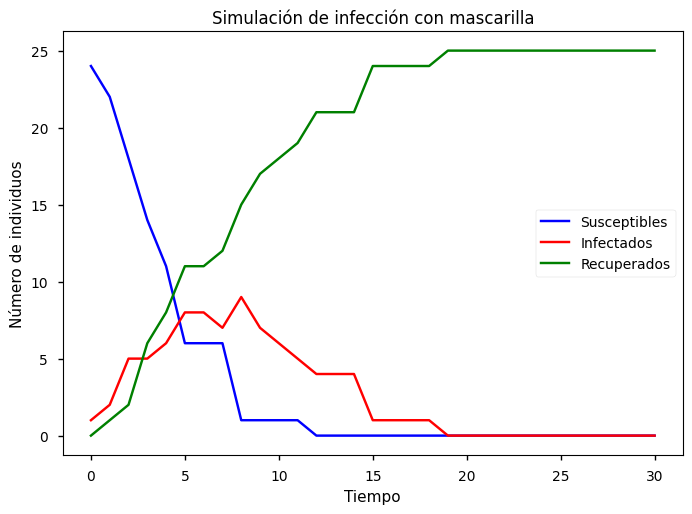

Resultados finales:
Total susceptibles: 0
Total infectados: 0
Total recuperados: 25


In [118]:
#show_data(data_inputs, name_app, SaveGraphic, mascarilla, NameGraphic):
kS, kI, kR = show_data(inputs9, 'st9', True, True, 'St_G9')

In [119]:
_, kind_I, _, _, kdaysI, _ = Monte_Carlo(n, True,inputs9, 'sta_9')

Media:  7.852886030382043
Error estandar de la media:  0.4109624482240094


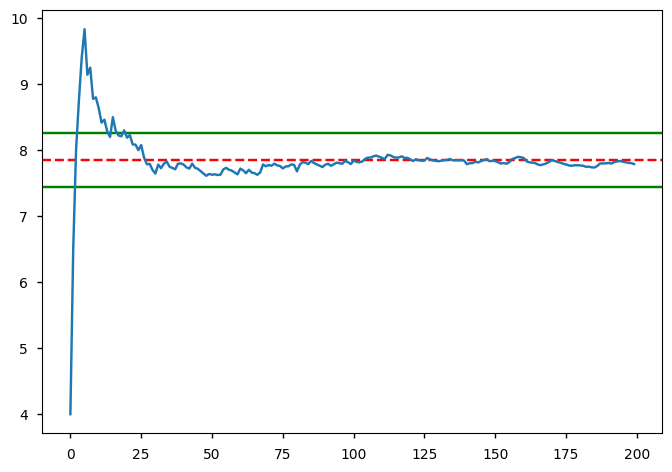

In [120]:
k1 = estaditicos(kdaysI, Save=True, Graphic=True, N_Grafico = 'ST9_dI')

Media:  10.349702925083927
Error estandar de la media:  0.23021725651006358


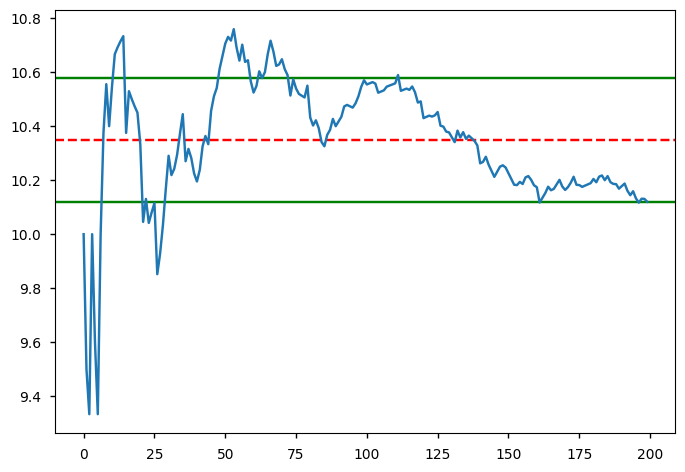

In [121]:
k2 = estaditicos(kind_I, Save=True, Graphic=True, N_Grafico = 'ST9_iI')

In [122]:
print('Dia esperado donde se presenta el maximo numero de contagios.\n')
K1 = estaditicos(kdaysI, Save=False, Graphic=False, N_Grafico = '')
print('\n', K1)
print('\nNumero maximo de contagios.\n')
K2 = estaditicos(ind_I, Save=False, Graphic=False, N_Grafico = '')
print('\n', K2)

Dia esperado donde se presenta el maximo numero de contagios.

Media:  7.852886030382043
Error estandar de la media:  0.4109624482240094

 Intervalo de confianza del 95%: [7.042485941165955,8.663286119598132]

Numero maximo de contagios.

Media:  19.46913966590295
Error estandar de la media:  0.32416612440135173

 Intervalo de confianza del 95%: [18.82989815546574,20.10838117634016]


#Intervalos de confianza

##Estrategia 100 - 25

In [145]:
N = 150
M = 100

In [146]:
inputs10 = inputs.copy()
inputs10['interaction rate'] = int(1 * inputs10['interaction rate'])
inputs10['total population'] = int(0.25 * inputs10['total population'])
inputs10

{'total population': 25,
 'initial infected': 1,
 'interaction rate': 13,
 'infection rate': 0.4,
 'recovery rate': 0.75,
 'recovery days': 7,
 'reinfection rate': 0.007,
 'simulation time': 30,
 'face mask': 0.5}

In [147]:
S_125, I_125, R_125 = simulacion(M, N, True ,inputs10 , 'E125')

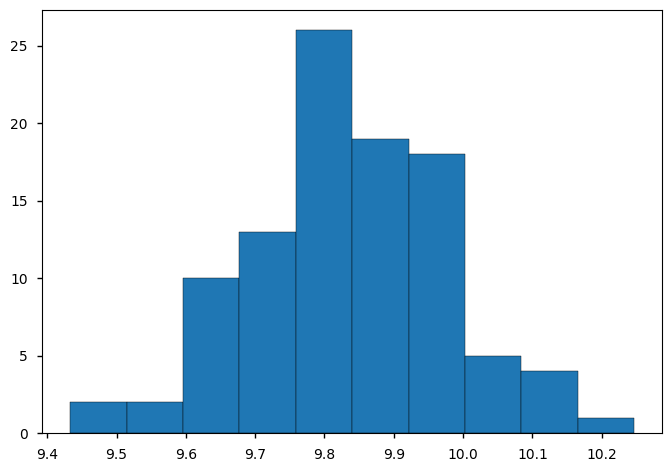

In [148]:
plt.hist(I_125, bins=10,edgecolor='black')
plt.savefig('H125.png')
plt.show()

In [149]:
Q = estaditicos(I_125, Save=True, Graphic=False, N_Grafico = 'IC_H125')
print(Q)

Media:  9.830533333333333
Error estandar de la media:  0.14410853934139745
Intervalo de confianza del 95%: [9.544590726714977,10.11647593995169]


##Estrategia 25 - 50

In [150]:
inputs11 = inputs.copy()
inputs11['interaction rate'] = int(0.25 * inputs11['interaction rate'])
inputs11['total population'] = int(0.5 * inputs11['total population'])
inputs11

{'total population': 50,
 'initial infected': 1,
 'interaction rate': 3,
 'infection rate': 0.4,
 'recovery rate': 0.75,
 'recovery days': 7,
 'reinfection rate': 0.007,
 'simulation time': 30,
 'face mask': 0.5}

In [151]:
S_255, I_255, R_255 = simulacion(M, N, True ,inputs11 , 'E255')

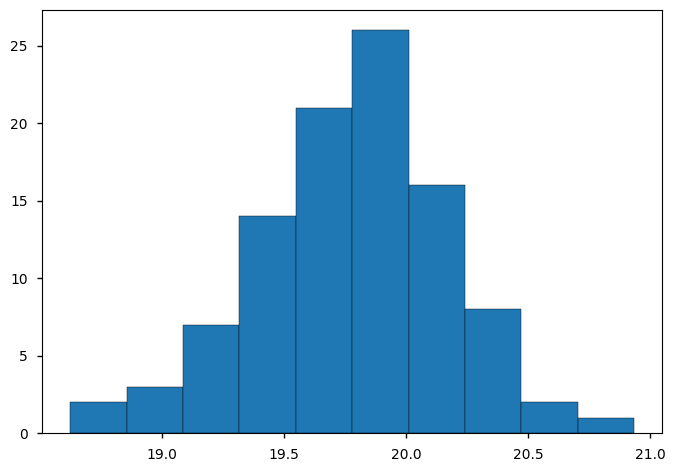

In [152]:
plt.hist(I_255, bins=10,edgecolor='black')
plt.savefig('H255.png')
plt.show()

In [153]:
R = estaditicos(I_255, Save=True, Graphic=False, N_Grafico = 'IC_H255')
print(R)

Media:  19.789066666666667
Error estandar de la media:  0.4014479570532429
Intervalo de confianza del 95%: [18.99250682513309,20.585626508200242]
